![Earthquake image](dave-goudreau-jviblDl60IE-unsplash.jpg)

The purpose of this analysis is to explore the distribution, intensity, and depth of earthquakes across different countries in select regions using real-world data. This analysis aims to uncover regional patterns, identify high-risk zones, and visualize the relationship between magnitude and depth, supporting better understanding of seismic behavior.

This is a structured sample dataset modeled after global earthquake data, used for learning and skill demonstration.

In [1]:
# Load all necessary packages
library(tidyverse)

# Import and name dataset
earthquakes <- read_csv("earthquakes_sample_dataset.csv")
glimpse(earthquakes)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 100 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Region
dbl  (4): Magnitude, Depth_km, Latitude, Longitude
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 100
Columns: 6
$ Date      <date> 2019-08-16, 2018-01-28, 2010-03-10, 2022-05-26, 2017-09-06,…
$ Region    <chr> "Turkey", "Indonesia", "Japan", "Mexico", "Indonesia", "Mexi…
$ Magnitude <dbl> 4.1, 7.2, 6.5, 6.2, 4.1, 7.6, 7.9, 7.8, 8.5, 7.9, 8.5, 7.0, …
$ Depth_km  <dbl> 262, 177, 152, 298, 107, 41, 234, 157, 177, 244, 247, 17, 27…
$ Latitude  <dbl> -7.628, -66.290, -67.379, -77.381, -21.261, -85.349, 42.280,…
$ Longitude <dbl> 154.303, 156.902, -49.895, -39.442, -2.240, 82.873, 14.007, …


In [26]:
# Group into regions

# Define a function to categorize countries into regions
categorize_region <- function(country) {
  if (country %in% c("California", "Mexico", "Chile", "Peru")) {
    return("Americas")
  } else if (country %in% c("Japan", "Indonesia", "China", "Nepal")) {
    return("Asia")
  } else if (country %in% c("Italy", "Greece", "Turkey")) {
    return("Europe")
  } else if (country %in% c("New Zealand", "Australia")) {
    return("Oceania")
  } else {
    return("Middle East")
  }
}

# Apply the function to create a new column 'Region'
earthquakes <- earthquakes %>%
  mutate(Region = lapply(Country, categorize_region)) %>%
	arrange(desc(Magnitude))

earthquakes

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `Region = lapply(Country, categorize_region)`.
[1mCaused by error in `lapply()`:[22m
[33m![39m object 'Country' not found


From the restructured table above, the country with the lowest magnitude (4) is Turkey and it took place on August 8, 2021.

In [22]:
# Filter for regions with the highest magnitudes
major_quakes <- earthquakes %>%
  filter(Magnitude >= 6) %>%
	arrange(desc(Magnitude))

major_quakes

Date       Country     Magnitude Depth_km Latitude Longitude Region 
1  2010-01-06 Japan       8.9       184       -7.117    56.028  Asia   
2  2003-06-16 New Zealand 8.9       269      -73.030    43.926  Asia   
3  2023-05-02 Japan       8.8       168       37.280    30.979  Asia   
4  2004-10-28 Mexico      8.8         7       50.350   -91.369  Asia   
5  2021-08-12 Turkey      8.8       250       12.628    30.158  Asia   
6  2006-12-13 Mexico      8.7        26       59.865     0.596  Asia   
7  2018-06-19 Japan       8.6       162       11.281   153.277  Asia   
8  2014-12-14 California  8.6       192      -86.293    95.798  Asia   
9  2008-05-04 Italy       8.6        36      -70.637  -139.325  Asia   
10 2017-10-23 New Zealand 8.5       177       -4.177   172.835  Asia   
11 2005-02-06 New Zealand 8.5       247       -4.344    71.610  Asia   
12 2019-05-22 California  8.5       199      -39.655  -170.892  Asia   
13 2008-02-02 Iran        8.5        54       75.824    42.523  Asia   
14 2022-01-02 Iran        8.4        16       65.391    17.503  Asia   
15 2010-04-14 Indonesia   8.4       212       29.101   112.146  Asia   
16 2004-01-02 Mexico      8.4       244       22.355    62.866  Asia   
17 2013-03-24 Mexico      8.3        73      -25.039    16.108  Asia   
18 2005-04-18 Chile       8.3       152       52.134   -58.750  Asia   
19 2002-09-10 Chile       8.3       192      -13.876  -177.261  Asia   
20 2017-07-28 Chile       8.2       171      -78.377  -120.807  Asia   
21 2003-07-12 California  8.1       221       88.938  -144.759  Asia   
22 2010-10-07 Indonesia   8.1       162       70.278  -171.445  Asia   
23 2023-07-27 California  8.0       165       19.394   -60.630  Asia   
24 2018-06-21 Italy       8.0        68      -34.526  -124.127  Asia   
25 2014-11-20 Turkey      7.9       234       42.280    14.007  Asia   
26 2006-05-23 Japan       7.9       244       37.858  -132.248  Asia   
27 2000-04-21 Mexico      7.9        14       21.779   135.785  Asia   
28 2015-10-23 Indonesia   7.9        86      -82.386    43.106  Asia   
29 2021-05-03 Chile       7.8       157       21.676   112.578  Asia   
30 2020-05-16 Iran        7.8       270      -57.760   150.391  Asia   
⋮  ⋮          ⋮           ⋮         ⋮        ⋮        ⋮         ⋮      
35 2011-01-19 New Zealand 7.7       231       22.017    60.254  Oceania
36 2016-04-28 Mexico      7.6        41      -85.349    82.873  Oceania
37 2013-08-03 Turkey      7.6       145      -73.003    95.281  Oceania
38 2023-06-02 California  7.6       181       16.511  -163.664  Oceania
39 2016-11-12 Mexico      7.6       260      -67.893   152.062  Oceania
40 2020-01-15 Indonesia   7.4       148       74.512  -145.986  Oceania
41 2017-03-28 Italy       7.3       240        1.045  -131.569  Oceania
42 2018-01-28 Indonesia   7.2       177      -66.290   156.902  Oceania
43 2014-12-09 Iran        7.2       117        8.902   168.724  Oceania
44 2002-08-15 Nepal       7.2       188      -29.223    43.966  Oceania
45 2012-01-24 Indonesia   7.1       266       24.709   -93.756  Oceania
46 2023-06-07 Indonesia   7.0        17       27.563   150.265  Oceania
47 2018-05-13 Turkey      7.0       100      -24.189   -65.650  Oceania
48 2002-12-03 Japan       6.9       282       -0.067    57.838  Oceania
49 2022-02-14 Nepal       6.9        97      -30.853   123.902  Oceania
50 2005-12-20 New Zealand 6.8       195      -89.682   -34.856  Oceania
51 2021-07-27 Iran        6.8        59       46.910   -31.820  Oceania
52 2003-05-14 Japan       6.8       144       -8.075    90.294  Oceania
53 2018-08-20 Italy       6.8        22       46.517   -26.604  Oceania
54 2010-03-10 Japan       6.5       152      -67.379   -49.895  Oceania
55 2022-11-06 Japan       6.5       286      -18.672    56.773  Oceania
56 2021-04-10 Japan       6.4       116       60.760    74.043  Oceania
57 2022-05-26 Mexico      6.2       298      -77.381   -39.442  Oceania
58 2008-12-14 Indonesia   6.2        24    

From the Major Earthquakes table above, Japan and New Zealand have the highest earthquake magnitudes (8.9) which occurred at a 7-year interval (January 6, 2010 and June 6, 2003 respectively) with the most recent being Japan.

In [24]:
# Average Earthquakes by region
earthquakes %>%
group_by(Region) %>%
summarise(avg_magnitude = mean(Magnitude)) %>%
arrange(desc(avg_magnitude))

Region  <NA>     <NA>        <NA> <NA>   avg_magnitude
1 Oceania Americas Middle East Asia Europe 6.975000     
2 Oceania Americas Middle East Asia Europe 6.822857     
3 Oceania Americas Middle East Asia Europe 6.810000     
4 Oceania Americas Middle East Asia Europe 6.624138     
5 Oceania Americas Middle East Asia Europe 6.283333

From the average magnitude table above, the region with the most high-magnitude events is Oceania (6.975).

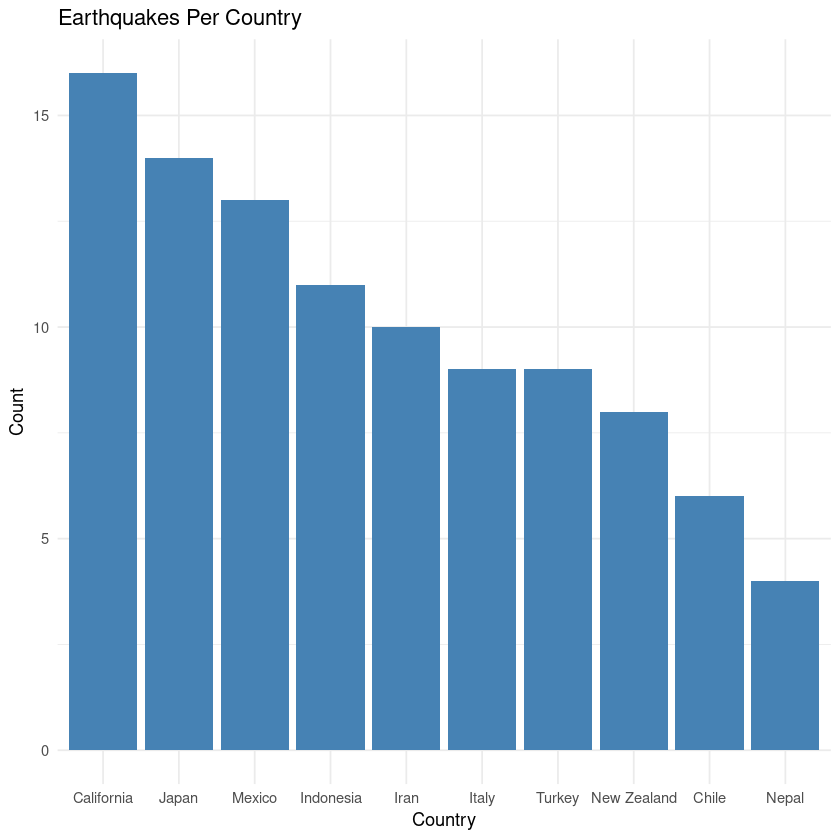

In [28]:
# Number of Earthquakes per Country (Visualization)
earthquakes %>%
count(Country) %>%
ggplot(aes(x = reorder(Country, -n), y = n)) +
geom_bar(stat = "identity", fill = "steelblue") +
labs(title = "Earthquakes Per Country", x = "Country", y = "Count") +
theme_minimal()



In [ ]:
From the Bar chart above, California has the highest number of earthquake occurences (16) and Nepal has the lowest occurences (4).

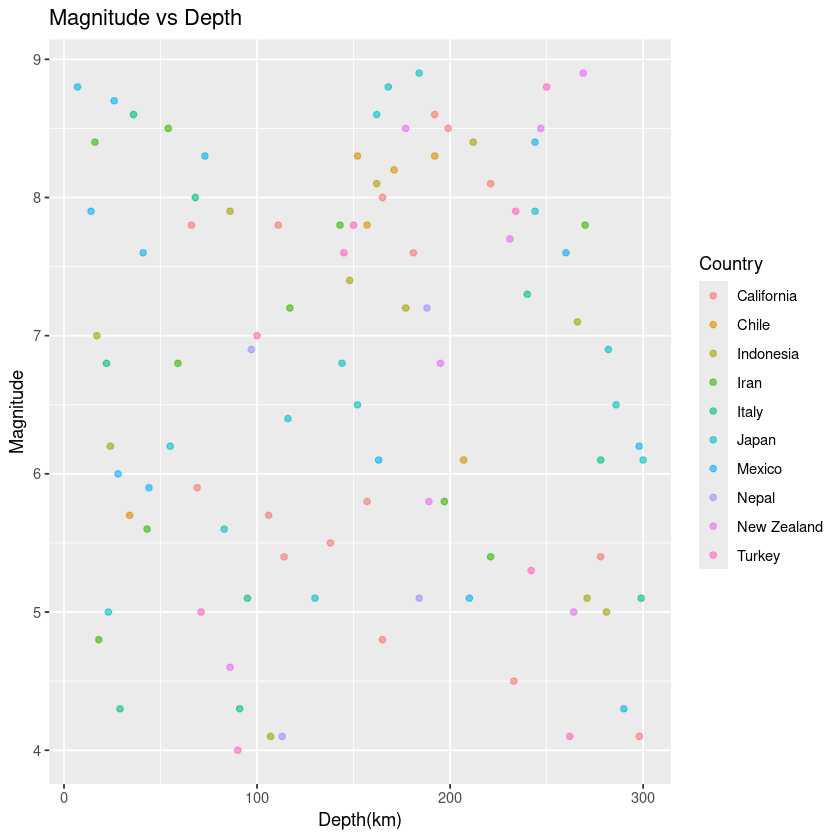

In [29]:
# Magnitude Versus Depth
ggplot(earthquakes, aes(x = Depth_km, y = Magnitude)) +
geom_point(aes(color = Country), alpha = 0.6) +
labs(title = "Magnitude vs Depth", x = "Depth(km)", y = "Magnitude") +
theme_grey()

From the scatter plot above, it can be said that the magnitude of an earthquake plays a minimal role in its depth determination.